In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/seattle-weather.csv')

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<ipython-input-4-b0f5536a7d55>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


<Axes: >

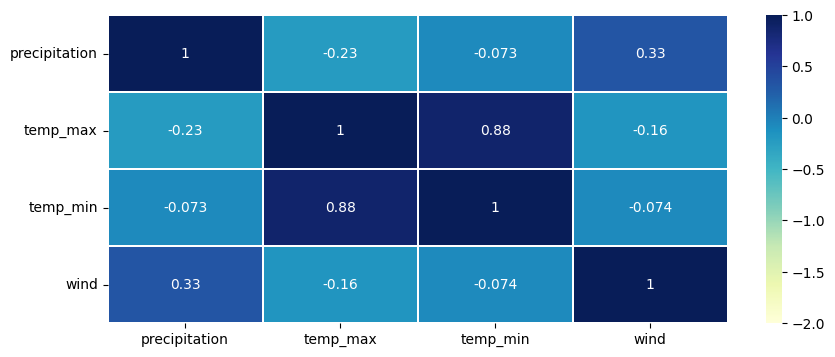

In [4]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

In [5]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [6]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [8]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
data.drop(['date','precipitation','temp_min'],axis=1,inplace=True)

In [10]:
data.columns

Index(['temp_max', 'wind', 'weather'], dtype='object')

In [11]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [12]:
data['weather']=data['weather'].replace({'drizzle':0})
data['weather']=data['weather'].replace({'rain':1})
data['weather']=data['weather'].replace({'sun':2})
data['weather']=data['weather'].replace({'snow':3})
data['weather']=data['weather'].replace({'fog':4})

In [13]:
data.dtypes

temp_max    float64
wind        float64
weather       int64
dtype: object

In [14]:
y=data['weather']
x=data.drop(['weather'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [17]:
x_test

,temp_max,wind
892,23.9,2.7
1105,7.8,0.5
413,9.4,3.4
522,26.7,2.5
1036,13.3,2.9
...,...,...
243,22.2,2.9
1342,18.3,2.9
1057,12.8,5.1
1418,8.9,4.2


In [18]:
y_test

892     2
1105    1
413     1
522     2
1036    1
       ..
243     2
1342    2
1057    1
1418    1
1023    1
Name: weather, Length: 366, dtype: int64

In [19]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
pickle.dump(lr,open('model.pkl','wb'))

In [20]:
predictions = model.predict(x_test)
predictions

array([1.82963086, 1.66569611, 1.47266103, 1.90362388, 1.59300903,
       1.79156792, 1.93698363, 1.74555455, 1.75384659, 1.81353211,
       1.84475898, 1.95211175, 1.32709528, 1.86085774, 1.52730806,
       1.31667036, 1.43653304, 1.57982221, 1.79142422, 1.67219056,
       1.36724322, 1.72848515, 1.80393413, 1.32986352, 1.89533184,
       1.50810577, 1.49768085, 1.42872632, 1.7074916 , 1.95730026,
       1.45525   , 1.88020372, 1.71903087, 1.45394407, 1.89892069,
       1.5773956 , 1.37766814, 1.35245673, 1.64828508, 1.87128266,
       1.16509548, 1.83060151, 1.69498169, 1.87923308, 1.43003859,
       1.49103637, 1.44419606, 1.3148791 , 1.95308239, 1.89892069,
       1.7248963 , 1.72635227, 1.73090543, 1.51086768, 1.63301327,
       1.57802461, 1.55038659, 1.90313856, 1.49981373, 1.77498383,
       1.31701198, 1.93795428, 1.47101347, 1.23356469, 1.79321548,
       1.79045358, 1.41069261, 2.06154951, 1.46029482, 1.68731867,
       1.4770226 , 1.68731867, 1.55494608, 1.50175502, 1.67902

In [21]:
print(y_test)

892     2
1105    1
413     1
522     2
1036    1
       ..
243     2
1342    2
1057    1
1418    1
1023    1
Name: weather, Length: 366, dtype: int64


In [22]:
print(predictions)

[1.82963086 1.66569611 1.47266103 1.90362388 1.59300903 1.79156792
 1.93698363 1.74555455 1.75384659 1.81353211 1.84475898 1.95211175
 1.32709528 1.86085774 1.52730806 1.31667036 1.43653304 1.57982221
 1.79142422 1.67219056 1.36724322 1.72848515 1.80393413 1.32986352
 1.89533184 1.50810577 1.49768085 1.42872632 1.7074916  1.95730026
 1.45525    1.88020372 1.71903087 1.45394407 1.89892069 1.5773956
 1.37766814 1.35245673 1.64828508 1.87128266 1.16509548 1.83060151
 1.69498169 1.87923308 1.43003859 1.49103637 1.44419606 1.3148791
 1.95308239 1.89892069 1.7248963  1.72635227 1.73090543 1.51086768
 1.63301327 1.57802461 1.55038659 1.90313856 1.49981373 1.77498383
 1.31701198 1.93795428 1.47101347 1.23356469 1.79321548 1.79045358
 1.41069261 2.06154951 1.46029482 1.68731867 1.4770226  1.68731867
 1.55494608 1.50175502 1.67902663 1.53525848 1.8379229  1.48240904
 1.4397866  1.09987983 1.51363591 1.51315059 1.43100923 1.91599009
 1.54078861 2.04220352 1.88476322 0.97351637 1.5357438  1.690422

In [23]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 0.77315223888103


In [24]:
type(x_test)

pandas.core.frame.DataFrame

In [25]:
data.columns

Index(['temp_max', 'wind', 'weather'], dtype='object')

In [ ]:
import pandas as pd
x=float(input('enter tempe_max'))
y=float(input('enter wind'))
data = [[x, y]]
data = pd.DataFrame(data, columns=['temp_max', 'wind'])
x=model.predict(data)
print(x)
if x<=0:
   print('weather is Drizzer')
elif x>0 or x<=2:
  print('weather is Rain')
elif x>2 or x<=3:
  print('weather is Sun')
elif x>3 or x<=4:
  print('weather is Snow')
elif x>=5:
   print('weather is Fog')

# a=pd.Series(x)
# c=pd.Series(y)

#b=pd.DataFrame([a,c])